# Clustering - Unsupervised Machine Learning

## Contents List:

#### 1. Import libraries and data
#### 2. Data preprocessing
#### 3. The elbow technique
#### 4. k-means clustering
     Cardiovascular Diseases vs Neoplasms
     Maternal Disorders vs Neonatal Disorders
     Alcohol Use Disorders (Alcoholism) vs Cirrhosis and Other Chronic Liver Diseases
     Acute Hepatitis vs Cirrhosis and Other Chronic Liver Diseases
#### 5. Calculate descriptive statistics

## 1. Import libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib

In [2]:
# Prompt matplotlib visuals to appear in the notebook 

%matplotlib inline

In [3]:
# Import merged_with_income_code.csv

path = r'C:\Users\susan\OneDrive\Desktop\Data Analytics Program\Causes_of_Death_Worldwide_Analysis_Susan_Lee'

df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'merged_with_income_code.csv'), index_col = False)

In [4]:
# Set the max columns and rows to none

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
df.head()

,Country/Territory,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,Maternal Disorders,HIV/AIDS,Drug Use Disorders,Tuberculosis,Cardiovascular Diseases,Lower Respiratory Infections,Neonatal Disorders,Alcohol Use Disorders,Self-harm,Exposure to Forces of Nature,Diarrheal Diseases,Environmental Heat and Cold Exposure,Neoplasms,Conflict and Terrorism,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis,Region,Income group,_merge,Income code
0,Afghanistan,AFG,1990,2159,1116,371,2087,93,1370,1538,2655,34,93,4661,44899,23741,15612,72,696,0,4235,175,11580,1490,2108,3709,338,2054,4154,5945,2673,5005,323,2985,South Asia,Low income,both,1
1,Afghanistan,AFG,1991,2218,1136,374,2153,189,1391,2001,2885,41,102,4743,45492,24504,17128,75,751,1347,4927,113,11796,3370,2120,3724,351,2119,4472,6050,2728,5120,332,3092,South Asia,Low income,both,1
2,Afghanistan,AFG,1992,2475,1162,378,2441,239,1514,2299,3315,48,118,4976,46557,27404,20060,80,855,614,6123,38,12218,4344,2153,3776,386,2404,5106,6223,2830,5335,360,3325,South Asia,Low income,both,1
3,Afghanistan,AFG,1993,2812,1187,384,2837,108,1687,2589,3671,56,132,5254,47951,31116,22335,85,943,225,8174,41,12634,4096,2195,3862,425,2797,5681,6445,2943,5568,396,3601,South Asia,Low income,both,1
4,Afghanistan,AFG,1994,3027,1211,391,3081,211,1809,2849,3863,63,142,5470,49308,33390,23288,88,993,160,8215,44,12914,8959,2231,3932,451,3038,6001,6664,3027,5739,420,3816,South Asia,Low income,both,1


In [6]:
df.shape

(6030, 38)

## 2. Data preprocessing

In [7]:
df.columns

Index(['Country/Territory', 'Code', 'Year', 'Meningitis',
       'Alzheimer's Disease and Other Dementias', 'Parkinson's Disease',
       'Nutritional Deficiencies', 'Malaria', 'Drowning',
       'Interpersonal Violence', 'Maternal Disorders', 'HIV/AIDS',
       'Drug Use Disorders', 'Tuberculosis', 'Cardiovascular Diseases',
       'Lower Respiratory Infections', 'Neonatal Disorders',
       'Alcohol Use Disorders', 'Self-harm', 'Exposure to Forces of Nature',
       'Diarrheal Diseases', 'Environmental Heat and Cold Exposure',
       'Neoplasms', 'Conflict and Terrorism', 'Diabetes Mellitus',
       'Chronic Kidney Disease', 'Poisonings', 'Protein-Energy Malnutrition',
       'Road Injuries', 'Chronic Respiratory Diseases',
       'Cirrhosis and Other Chronic Liver Diseases', 'Digestive Diseases',
       'Fire, Heat, and Hot Substances', 'Acute Hepatitis', 'Region',
       'Income group', '_merge', 'Income code'],
      dtype='object')

In [8]:
# Create a subset to remove categorical variables

sub = df[['Year', 'Meningitis',
       "Alzheimer's Disease and Other Dementias", "Parkinson's Disease",
       'Nutritional Deficiencies', 'Malaria', 'Drowning',
       'Interpersonal Violence', 'Maternal Disorders', 'HIV/AIDS',
       'Drug Use Disorders', 'Tuberculosis', 'Cardiovascular Diseases',
       'Lower Respiratory Infections', 'Neonatal Disorders',
       'Alcohol Use Disorders', 'Self-harm', 'Exposure to Forces of Nature',
       'Diarrheal Diseases', 'Environmental Heat and Cold Exposure',
       'Neoplasms', 'Conflict and Terrorism', 'Diabetes Mellitus',
       'Chronic Kidney Disease', 'Poisonings', 'Protein-Energy Malnutrition',
       'Road Injuries', 'Chronic Respiratory Diseases',
       'Cirrhosis and Other Chronic Liver Diseases', 'Digestive Diseases',
       'Fire, Heat, and Hot Substances', 'Acute Hepatitis', 'Income code']]

In [9]:
sub.head()

,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,Maternal Disorders,HIV/AIDS,Drug Use Disorders,Tuberculosis,Cardiovascular Diseases,Lower Respiratory Infections,Neonatal Disorders,Alcohol Use Disorders,Self-harm,Exposure to Forces of Nature,Diarrheal Diseases,Environmental Heat and Cold Exposure,Neoplasms,Conflict and Terrorism,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis,Income code
0,1990,2159,1116,371,2087,93,1370,1538,2655,34,93,4661,44899,23741,15612,72,696,0,4235,175,11580,1490,2108,3709,338,2054,4154,5945,2673,5005,323,2985,1
1,1991,2218,1136,374,2153,189,1391,2001,2885,41,102,4743,45492,24504,17128,75,751,1347,4927,113,11796,3370,2120,3724,351,2119,4472,6050,2728,5120,332,3092,1
2,1992,2475,1162,378,2441,239,1514,2299,3315,48,118,4976,46557,27404,20060,80,855,614,6123,38,12218,4344,2153,3776,386,2404,5106,6223,2830,5335,360,3325,1
3,1993,2812,1187,384,2837,108,1687,2589,3671,56,132,5254,47951,31116,22335,85,943,225,8174,41,12634,4096,2195,3862,425,2797,5681,6445,2943,5568,396,3601,1
4,1994,3027,1211,391,3081,211,1809,2849,3863,63,142,5470,49308,33390,23288,88,993,160,8215,44,12914,8959,2231,3932,451,3038,6001,6664,3027,5739,420,3816,1


## 3. The elbow technique

In [10]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above

In [11]:
score = [kmeans[i].fit(sub).score(sub) for i in range(len(kmeans))] # Creates a score that represents a rate of variation for the given cluster option

score

[-846136761240104.9,
 -255963847139079.53,
 -156200820786583.72,
 -90513566574106.12,
 -61885845273325.67,
 -47093586884372.4,
 -40054355845544.96,
 -33562651763496.824,
 -28404890868854.734]

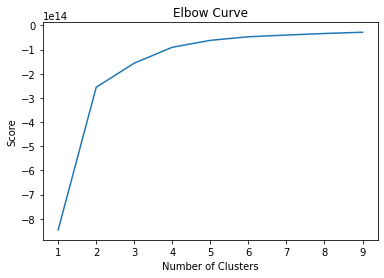

In [12]:
# Plot the elbow curve using PyLab

pl.plot(num_cl, score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#####  There is an elbow or "bend" at two on the x-axis. This means that the optimal count for fitting the k-means clustering model is two.

## 4. k-means clustering

In [53]:
# Create the k-means object

kmeans = KMeans(n_clusters = 2, n_jobs = -1)

In [54]:
# Fit the k-means object to the data

kmeans.fit(sub)

C:\Users\susan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=2, n_jobs=-1)

In [55]:
sub['clusters'] = kmeans.fit_predict(sub)

C:\Users\susan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
<ipython-input-55-97c7b350e8f1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['clusters'] = kmeans.fit_predict(sub)


In [56]:
sub.head()

,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,Maternal Disorders,HIV/AIDS,Drug Use Disorders,Tuberculosis,Cardiovascular Diseases,Lower Respiratory Infections,Neonatal Disorders,Alcohol Use Disorders,Self-harm,Exposure to Forces of Nature,Diarrheal Diseases,Environmental Heat and Cold Exposure,Neoplasms,Conflict and Terrorism,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis,Income code,clusters
0,1990,2159,1116,371,2087,93,1370,1538,2655,34,93,4661,44899,23741,15612,72,696,0,4235,175,11580,1490,2108,3709,338,2054,4154,5945,2673,5005,323,2985,1,0
1,1991,2218,1136,374,2153,189,1391,2001,2885,41,102,4743,45492,24504,17128,75,751,1347,4927,113,11796,3370,2120,3724,351,2119,4472,6050,2728,5120,332,3092,1,0
2,1992,2475,1162,378,2441,239,1514,2299,3315,48,118,4976,46557,27404,20060,80,855,614,6123,38,12218,4344,2153,3776,386,2404,5106,6223,2830,5335,360,3325,1,0
3,1993,2812,1187,384,2837,108,1687,2589,3671,56,132,5254,47951,31116,22335,85,943,225,8174,41,12634,4096,2195,3862,425,2797,5681,6445,2943,5568,396,3601,1,0
4,1994,3027,1211,391,3081,211,1809,2849,3863,63,142,5470,49308,33390,23288,88,993,160,8215,44,12914,8959,2231,3932,451,3038,6001,6664,3027,5739,420,3816,1,0


In [57]:
sub['clusters'].value_counts()

0    5970
1      60
Name: clusters, dtype: int64

### Cardiovascular Diseases vs Neoplasms

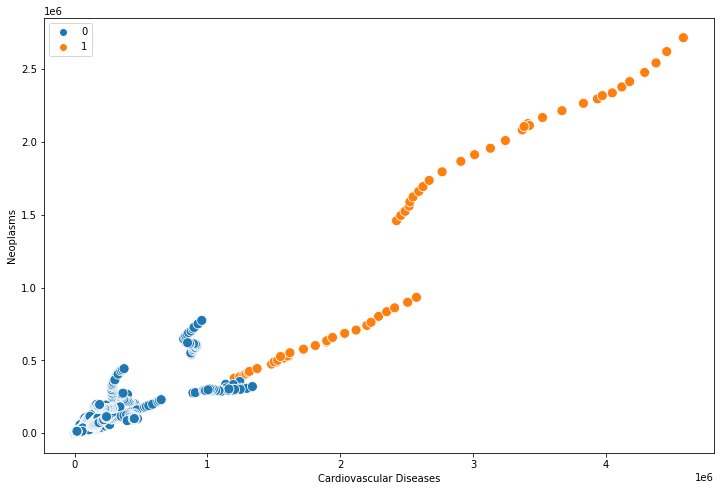

In [72]:
# Plot the clusters for the 'Cardiovascular Diseases' and 'Neoplasms' variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub['Cardiovascular Diseases'], y=sub['Neoplasms'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Cardiovascular Diseases')
plt.ylabel('Neoplasms')
plt.show()

In [71]:
df[df['Neoplasms'] >1000000]

,Country/Territory,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,Maternal Disorders,HIV/AIDS,Drug Use Disorders,Tuberculosis,Cardiovascular Diseases,Lower Respiratory Infections,Neonatal Disorders,Alcohol Use Disorders,Self-harm,Exposure to Forces of Nature,Diarrheal Diseases,Environmental Heat and Cold Exposure,Neoplasms,Conflict and Terrorism,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis,Region,Income group,_merge,Income code,clusters
1110,China,CHN,2007,8407,187358,52766,10611,21,76277,23339,5014,14992,10723,66462,3413237,190310,99540,21274,159417,1180,11643,4625,2126460,88,123442,142069,27780,7878,324159,1161612,170433,297567,11500,5017,East Asia & Pacific,Upper middle income,both,3,1
1111,China,CHN,2008,8384,197380,54828,10623,15,73624,21775,4534,16310,10288,61286,3523450,187559,93539,21408,154710,88421,10058,4676,2168067,114,125045,146413,28939,7906,327299,1149016,167955,292928,11363,4757,East Asia & Pacific,Upper middle income,both,3,1
1112,China,CHN,2009,8394,208139,57485,10874,9,72888,20659,4207,16364,9981,56959,3669964,186990,87453,21192,150572,611,8901,4447,2214787,392,128147,152838,30105,8098,329237,1145608,164921,288756,11346,4509,East Asia & Pacific,Upper middle income,both,3,1
1113,China,CHN,2010,8341,218436,60241,11293,12,70955,18926,3762,16722,9838,53312,3831636,186499,79733,21077,146044,7175,7891,4454,2265802,19,132114,160396,30838,8425,327545,1139700,162119,285663,11362,4334,East Asia & Pacific,Upper middle income,both,3,1
1114,China,CHN,2011,8193,225852,61781,11739,11,66696,17477,3350,17075,9567,50513,3937801,184317,75901,20738,139061,844,7198,4400,2296328,67,134980,165833,30883,8809,315824,1115828,158710,281834,11152,4212,East Asia & Pacific,Upper middle income,both,3,1
1115,China,CHN,2012,8057,232656,62640,12120,0,65110,16177,3015,16455,9170,48260,3973790,181048,74505,20458,131641,871,6779,4441,2318471,55,137073,169494,30494,9145,300970,1083590,155219,277791,10934,4158,East Asia & Pacific,Upper middle income,both,3,1
1116,China,CHN,2013,7971,239240,63853,12748,0,63152,15134,2761,17728,8989,46072,4049045,178100,68958,20181,126196,1402,6452,4616,2337453,213,140303,173650,30263,9690,288937,1058374,151718,273718,10851,4160,East Asia & Pacific,Upper middle income,both,3,1
1117,China,CHN,2014,7740,249056,65555,13528,0,62733,14194,2340,21784,8980,43438,4120839,175785,63241,20069,123006,1684,6131,4582,2378155,425,145136,177089,29957,10365,279949,1042132,149653,271449,10766,4143,East Asia & Pacific,Upper middle income,both,3,1
1118,China,CHN,2015,7553,259217,66761,14487,0,61489,13512,2341,26060,8872,41987,4180060,175523,66013,19893,120453,551,6078,4720,2414868,211,149030,179638,29323,11176,268987,1029418,148056,270036,10738,4171,East Asia & Pacific,Upper middle income,both,3,1
1119,China,CHN,2016,7550,275481,69364,15827,0,61049,13076,2510,29402,8964,42073,4292981,179477,66904,19803,121045,1340,6243,5072,2477718,20,155700,184528,29051,12262,262951,1039047,148104,271648,10789,4234,East Asia & Pacific,Upper middle income,both,3,1


In [73]:
df[df['Cardiovascular Diseases'] >1500000]

,Country/Territory,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,Maternal Disorders,HIV/AIDS,Drug Use Disorders,Tuberculosis,Cardiovascular Diseases,Lower Respiratory Infections,Neonatal Disorders,Alcohol Use Disorders,Self-harm,Exposure to Forces of Nature,Diarrheal Diseases,Environmental Heat and Cold Exposure,Neoplasms,Conflict and Terrorism,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis,Region,Income group,_merge,Income code,clusters
1110,China,CHN,2007,8407,187358,52766,10611,21,76277,23339,5014,14992,10723,66462,3413237,190310,99540,21274,159417,1180,11643,4625,2126460,88,123442,142069,27780,7878,324159,1161612,170433,297567,11500,5017,East Asia & Pacific,Upper middle income,both,3,1
1111,China,CHN,2008,8384,197380,54828,10623,15,73624,21775,4534,16310,10288,61286,3523450,187559,93539,21408,154710,88421,10058,4676,2168067,114,125045,146413,28939,7906,327299,1149016,167955,292928,11363,4757,East Asia & Pacific,Upper middle income,both,3,1
1112,China,CHN,2009,8394,208139,57485,10874,9,72888,20659,4207,16364,9981,56959,3669964,186990,87453,21192,150572,611,8901,4447,2214787,392,128147,152838,30105,8098,329237,1145608,164921,288756,11346,4509,East Asia & Pacific,Upper middle income,both,3,1
1113,China,CHN,2010,8341,218436,60241,11293,12,70955,18926,3762,16722,9838,53312,3831636,186499,79733,21077,146044,7175,7891,4454,2265802,19,132114,160396,30838,8425,327545,1139700,162119,285663,11362,4334,East Asia & Pacific,Upper middle income,both,3,1
1114,China,CHN,2011,8193,225852,61781,11739,11,66696,17477,3350,17075,9567,50513,3937801,184317,75901,20738,139061,844,7198,4400,2296328,67,134980,165833,30883,8809,315824,1115828,158710,281834,11152,4212,East Asia & Pacific,Upper middle income,both,3,1
1115,China,CHN,2012,8057,232656,62640,12120,0,65110,16177,3015,16455,9170,48260,3973790,181048,74505,20458,131641,871,6779,4441,2318471,55,137073,169494,30494,9145,300970,1083590,155219,277791,10934,4158,East Asia & Pacific,Upper middle income,both,3,1
1116,China,CHN,2013,7971,239240,63853,12748,0,63152,15134,2761,17728,8989,46072,4049045,178100,68958,20181,126196,1402,6452,4616,2337453,213,140303,173650,30263,9690,288937,1058374,151718,273718,10851,4160,East Asia & Pacific,Upper middle income,both,3,1
1117,China,CHN,2014,7740,249056,65555,13528,0,62733,14194,2340,21784,8980,43438,4120839,175785,63241,20069,123006,1684,6131,4582,2378155,425,145136,177089,29957,10365,279949,1042132,149653,271449,10766,4143,East Asia & Pacific,Upper middle income,both,3,1
1118,China,CHN,2015,7553,259217,66761,14487,0,61489,13512,2341,26060,8872,41987,4180060,175523,66013,19893,120453,551,6078,4720,2414868,211,149030,179638,29323,11176,268987,1029418,148056,270036,10738,4171,East Asia & Pacific,Upper middle income,both,3,1
1119,China,CHN,2016,7550,275481,69364,15827,0,61049,13076,2510,29402,8964,42073,4292981,179477,66904,19803,121045,1340,6243,5072,2477718,20,155700,184528,29051,12262,262951,1039047,148104,271648,10789,4234,East Asia & Pacific,Upper middle income,both,3,1


#### The orange cluster has higher DALY's  (Disability Adjusted Life Years) on average than the blue cluster for cardiovascular diseases and neoplasms. This makes sense since the orange cluster consists of China and India which have the largest populations. However, China has significantly more DALY's in both categories than India, even though their population size is similar. This could be due to another factor such as China having a higher life expectancy than India, which would make sense because the likelihood of developing cardiovascular diseases and neoplasms increases with age.

### Maternal Disorders vs Neonatal Disorders

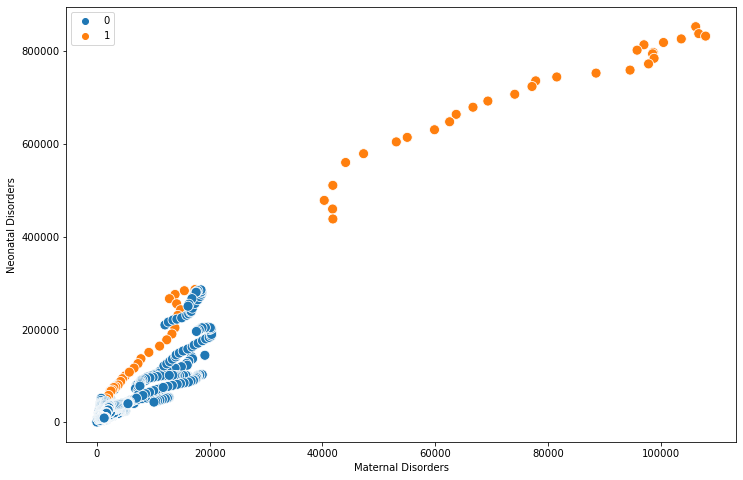

In [76]:
# Plot the clusters for the 'Maternal Disorders' and 'Neonatal Disorders' variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub['Maternal Disorders'], y=sub['Neonatal Disorders'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Maternal Disorders')
plt.ylabel('Neonatal Disorders')
plt.show()

In [77]:
df[df['Neonatal Disorders'] >400000]

,Country/Territory,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,Maternal Disorders,HIV/AIDS,Drug Use Disorders,Tuberculosis,Cardiovascular Diseases,Lower Respiratory Infections,Neonatal Disorders,Alcohol Use Disorders,Self-harm,Exposure to Forces of Nature,Diarrheal Diseases,Environmental Heat and Cold Exposure,Neoplasms,Conflict and Terrorism,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis,Region,Income group,_merge,Income code,clusters
2400,India,IND,2007,62224,53407,26269,67671,68053,67595,44087,69323,163270,6092,490850,1812605,525259,692363,18619,195456,2051,849219,10811,601219,2269,171589,163299,5556,47214,190881,875894,230556,415019,24467,61028,South Asia,Lower middle income,both,2,2
2401,India,IND,2008,60843,56488,27779,63747,62028,67494,44464,66685,155231,6120,492343,1897232,521542,679052,19487,194152,1738,845116,10714,625818,2580,179626,168171,5573,43721,199985,913387,238390,424444,24771,60371,South Asia,Lower middle income,both,2,2
2402,India,IND,2009,58449,59418,27243,58734,58617,65811,43077,63708,142325,6216,474490,1898640,500924,663701,19473,190547,1773,802659,10732,634222,2319,177064,165221,5323,39887,202133,890411,236152,415534,24568,57677,South Asia,Lower middle income,both,2,2
2403,India,IND,2012,53433,75330,30619,51001,42686,66282,39520,55026,101377,6023,461592,2119847,480048,614052,20471,198142,335,761001,11672,707505,1074,207229,178139,4772,32879,218869,958036,247920,422871,24864,53069,South Asia,Lower middle income,both,2,2
2404,India,IND,2013,52065,84796,34226,47070,32921,63122,39234,53088,91805,6495,466722,2200623,485209,604279,20511,192867,6562,738243,12197,739345,624,218827,185457,4617,29696,213635,1013921,246916,425083,24815,47702,South Asia,Lower middle income,both,2,2
2405,India,IND,2015,45025,98764,37450,37961,50605,56352,38837,44105,66792,6986,445845,2289079,463048,559843,20753,180206,1152,674059,13571,801613,724,235067,195704,4298,22448,201060,1065412,247930,427616,24094,38167,South Asia,Lower middle income,both,2,2
2406,India,IND,1990,98358,24195,13419,268223,162369,88688,38720,106173,1138,3466,613999,1201775,690913,852761,12818,154133,2097,1081098,10057,376687,7966,78789,92805,7257,202241,129821,601995,144247,315248,23032,61782,South Asia,Lower middle income,both,2,2
2407,India,IND,1991,97134,24862,14011,253431,159473,88014,37806,106715,1707,3559,637316,1243951,682280,837776,13067,159309,2641,1100375,10045,387105,4721,82661,97100,7337,188418,135557,621913,146547,321460,23373,63189,South Asia,Lower middle income,both,2,2
2408,India,IND,1992,94891,25353,14394,237280,151759,86073,38859,107929,3045,3614,657515,1273738,675001,832447,13166,163032,977,1119477,10528,395789,4840,85848,100695,7355,174878,138623,635103,147875,325680,23576,63765,South Asia,Lower middle income,both,2,2
2409,India,IND,1993,91783,26306,14824,222390,142187,85025,39355,103614,5703,3749,625704,1289988,656565,826406,13442,164001,11251,1081215,10170,406002,1896,88235,102753,7008,163748,141224,642943,152524,332205,23482,64305,South Asia,Lower middle income,both,2,2


#### The orange cluster has higher DALY's on average than the blue cluster for maternal disorders and neonatal disorders. This makes sense since the orange cluster consists of India which has one of the largest populations. It is interesting that the number of DALY's are not as high for China which has a similar population size as India. This could be due to another factor such as India having a higher fertility rate than China, especially because China had a one-child policy during most of the years the data was collected from.

### Alcohol Use Disorders (Alcoholism) vs Cirrhosis and Other Chronic Liver Diseases

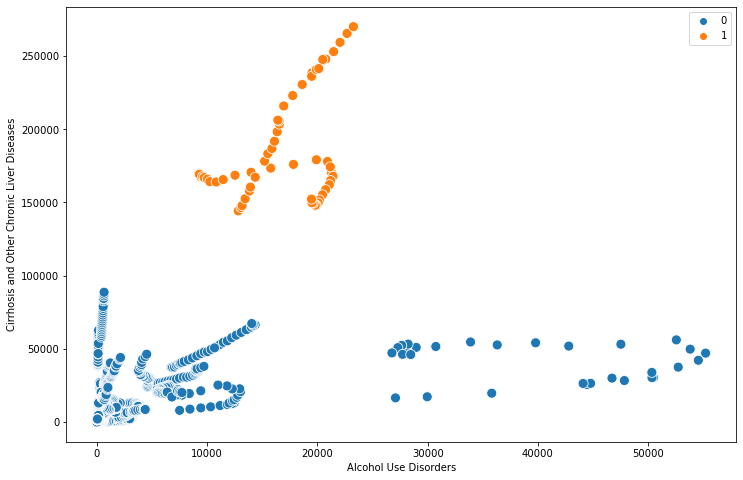

In [84]:
# Plot the clusters for the 'Alcohol Use Disorders' and 'Cirrhosis and Other Chronic Liver Diseases' variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub['Alcohol Use Disorders'], y=sub['Cirrhosis and Other Chronic Liver Diseases'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Alcohol Use Disorders')
plt.ylabel('Cirrhosis and Other Chronic Liver Diseases')
plt.show()

In [88]:
df[df['Alcohol Use Disorders'] > 25000]

,Country/Territory,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,Maternal Disorders,HIV/AIDS,Drug Use Disorders,Tuberculosis,Cardiovascular Diseases,Lower Respiratory Infections,Neonatal Disorders,Alcohol Use Disorders,Self-harm,Exposure to Forces of Nature,Diarrheal Diseases,Environmental Heat and Cold Exposure,Neoplasms,Conflict and Terrorism,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis,Region,Income group,_merge,Income code,clusters
4410,Russia,RUS,1990,2255,23706,5882,465,0,13528,28335,958,3377,4495,10378,890902,22422,15687,27077,46396,86,1610,14144,276015,192,8538,9023,8691,239,39298,57982,16502,43349,7205,159,Europe & Central Asia,Upper middle income,both,3,2
4411,Russia,RUS,1991,2199,24804,5987,473,0,14178,30982,925,3685,4902,10594,908560,22628,14474,29957,49054,116,1547,15027,277809,271,8903,9292,8977,244,39515,58080,17257,44622,7592,154,Europe & Central Asia,Upper middle income,both,3,2
4412,Russia,RUS,1992,2253,25388,6228,516,0,15559,41586,817,4193,5727,12208,969386,24635,12324,35807,57273,114,1542,17808,293573,36,9678,10067,9922,262,41484,61139,19707,49407,8701,152,Europe & Central Asia,Upper middle income,both,3,2
4413,Russia,RUS,1993,2564,26077,6912,623,0,19098,56102,819,5225,7142,16848,1137879,30606,12045,44435,73110,151,1732,24246,335217,147,11517,11879,12105,306,47191,69997,25602,60310,11030,163,Europe & Central Asia,Upper middle income,both,3,2
4414,Russia,RUS,1994,2803,26677,7286,691,0,21430,63629,870,6226,8049,21057,1243883,34781,11656,50470,83237,162,1786,29048,354235,277,12678,12960,13449,334,49102,74217,30406,67981,12594,173,Europe & Central Asia,Upper middle income,both,3,2
4415,Russia,RUS,1995,2689,26650,7038,659,0,20808,61876,806,6706,7941,20927,1194364,34138,10882,50338,79951,203,1671,27835,333212,2055,12210,12270,12798,325,44806,69003,30320,66385,12156,173,Europe & Central Asia,Upper middle income,both,3,2
4416,Russia,RUS,1996,2387,26918,6846,605,0,18380,52944,698,7237,7737,19624,1141680,31808,9768,47830,73398,154,1447,24406,310228,2901,11491,11340,11871,305,39482,64423,28354,62300,11353,168,Europe & Central Asia,Upper middle income,both,3,2
4417,Russia,RUS,1997,2203,26786,6729,558,0,16558,47709,658,7152,7603,18473,1104033,29932,9433,44772,66834,128,1294,21418,292701,75,10812,10553,11073,289,35532,60386,26424,58632,10557,166,Europe & Central Asia,Upper middle income,both,3,2
4418,Russia,RUS,1998,2112,26820,6718,547,0,16448,46589,588,6578,8020,18514,1103547,30162,8921,44090,65412,122,1229,20510,286341,57,10426,10315,10958,285,35166,57608,26352,58314,10648,166,Europe & Central Asia,Upper middle income,both,3,2
4419,Russia,RUS,1999,2230,27413,7157,602,0,18008,52417,596,8449,9199,21519,1196838,35075,8870,46710,71781,91,1275,21986,301575,7145,10696,11050,11876,311,38627,60175,29995,64587,12229,177,Europe & Central Asia,Upper middle income,both,3,2


In [89]:
df[df['Cirrhosis and Other Chronic Liver Diseases'] > 100000]

,Country/Territory,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,Maternal Disorders,HIV/AIDS,Drug Use Disorders,Tuberculosis,Cardiovascular Diseases,Lower Respiratory Infections,Neonatal Disorders,Alcohol Use Disorders,Self-harm,Exposure to Forces of Nature,Diarrheal Diseases,Environmental Heat and Cold Exposure,Neoplasms,Conflict and Terrorism,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis,Region,Income group,_merge,Income code,clusters
1110,China,CHN,2007,8407,187358,52766,10611,21,76277,23339,5014,14992,10723,66462,3413237,190310,99540,21274,159417,1180,11643,4625,2126460,88,123442,142069,27780,7878,324159,1161612,170433,297567,11500,5017,East Asia & Pacific,Upper middle income,both,3,1
1111,China,CHN,2008,8384,197380,54828,10623,15,73624,21775,4534,16310,10288,61286,3523450,187559,93539,21408,154710,88421,10058,4676,2168067,114,125045,146413,28939,7906,327299,1149016,167955,292928,11363,4757,East Asia & Pacific,Upper middle income,both,3,1
1112,China,CHN,2009,8394,208139,57485,10874,9,72888,20659,4207,16364,9981,56959,3669964,186990,87453,21192,150572,611,8901,4447,2214787,392,128147,152838,30105,8098,329237,1145608,164921,288756,11346,4509,East Asia & Pacific,Upper middle income,both,3,1
1113,China,CHN,2010,8341,218436,60241,11293,12,70955,18926,3762,16722,9838,53312,3831636,186499,79733,21077,146044,7175,7891,4454,2265802,19,132114,160396,30838,8425,327545,1139700,162119,285663,11362,4334,East Asia & Pacific,Upper middle income,both,3,1
1114,China,CHN,2011,8193,225852,61781,11739,11,66696,17477,3350,17075,9567,50513,3937801,184317,75901,20738,139061,844,7198,4400,2296328,67,134980,165833,30883,8809,315824,1115828,158710,281834,11152,4212,East Asia & Pacific,Upper middle income,both,3,1
1115,China,CHN,2012,8057,232656,62640,12120,0,65110,16177,3015,16455,9170,48260,3973790,181048,74505,20458,131641,871,6779,4441,2318471,55,137073,169494,30494,9145,300970,1083590,155219,277791,10934,4158,East Asia & Pacific,Upper middle income,both,3,1
1116,China,CHN,2013,7971,239240,63853,12748,0,63152,15134,2761,17728,8989,46072,4049045,178100,68958,20181,126196,1402,6452,4616,2337453,213,140303,173650,30263,9690,288937,1058374,151718,273718,10851,4160,East Asia & Pacific,Upper middle income,both,3,1
1117,China,CHN,2014,7740,249056,65555,13528,0,62733,14194,2340,21784,8980,43438,4120839,175785,63241,20069,123006,1684,6131,4582,2378155,425,145136,177089,29957,10365,279949,1042132,149653,271449,10766,4143,East Asia & Pacific,Upper middle income,both,3,1
1118,China,CHN,2015,7553,259217,66761,14487,0,61489,13512,2341,26060,8872,41987,4180060,175523,66013,19893,120453,551,6078,4720,2414868,211,149030,179638,29323,11176,268987,1029418,148056,270036,10738,4171,East Asia & Pacific,Upper middle income,both,3,1
1119,China,CHN,2016,7550,275481,69364,15827,0,61049,13076,2510,29402,8964,42073,4292981,179477,66904,19803,121045,1340,6243,5072,2477718,20,155700,184528,29051,12262,262951,1039047,148104,271648,10789,4234,East Asia & Pacific,Upper middle income,both,3,1


#### The points in the blue cluster that have the highest DALY's for alcohol use disorders (alcoholism) belong to Russia, which makes sense because their alcohol consumption rate is among the highest in the world. The orange cluster has the highest DALY's for cirrhosis and other chronic liver diseases, but it falls in the middle for alcohol use disorders. This is likely due to the countries in the orange cluster (China and India) having a lower alcohol consumption rate than Russia.

#### Since cirrhosis and other chronic liver diseases can be caused by hepatitis, let's see if there's a pattern between acute hepatitis and cirrhosis and other chronic liver diseases.

### Acute Hepatitis vs Cirrhosis and Other Chronic Liver Diseases

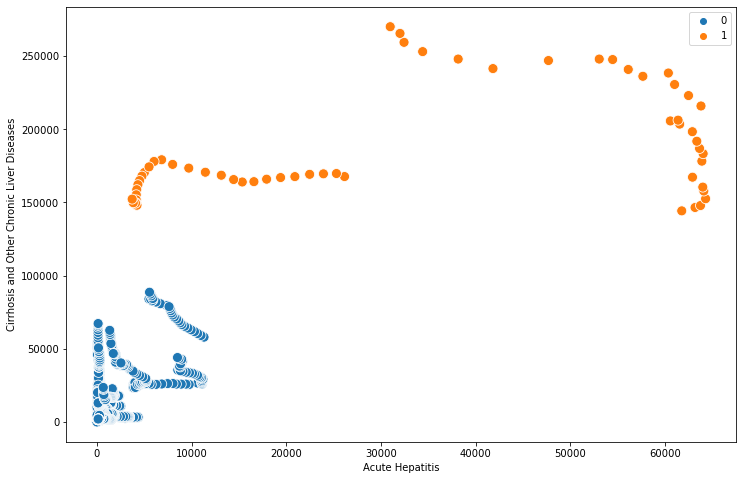

In [85]:
# Plot the clusters for the 'Acute Hepatitis' and 'Cirrhosis and Other Chronic Liver Diseases' variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub['Acute Hepatitis'], y=sub['Cirrhosis and Other Chronic Liver Diseases'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Acute Hepatitis')
plt.ylabel('Cirrhosis and Other Chronic Liver Diseases')
plt.show()

In [87]:
df[df['Acute Hepatitis'] > 30000]

,Country/Territory,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,Maternal Disorders,HIV/AIDS,Drug Use Disorders,Tuberculosis,Cardiovascular Diseases,Lower Respiratory Infections,Neonatal Disorders,Alcohol Use Disorders,Self-harm,Exposure to Forces of Nature,Diarrheal Diseases,Environmental Heat and Cold Exposure,Neoplasms,Conflict and Terrorism,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis,Region,Income group,_merge,Income code,clusters
2400,India,IND,2007,62224,53407,26269,67671,68053,67595,44087,69323,163270,6092,490850,1812605,525259,692363,18619,195456,2051,849219,10811,601219,2269,171589,163299,5556,47214,190881,875894,230556,415019,24467,61028,South Asia,Lower middle income,both,2,2
2401,India,IND,2008,60843,56488,27779,63747,62028,67494,44464,66685,155231,6120,492343,1897232,521542,679052,19487,194152,1738,845116,10714,625818,2580,179626,168171,5573,43721,199985,913387,238390,424444,24771,60371,South Asia,Lower middle income,both,2,2
2402,India,IND,2009,58449,59418,27243,58734,58617,65811,43077,63708,142325,6216,474490,1898640,500924,663701,19473,190547,1773,802659,10732,634222,2319,177064,165221,5323,39887,202133,890411,236152,415534,24568,57677,South Asia,Lower middle income,both,2,2
2403,India,IND,2012,53433,75330,30619,51001,42686,66282,39520,55026,101377,6023,461592,2119847,480048,614052,20471,198142,335,761001,11672,707505,1074,207229,178139,4772,32879,218869,958036,247920,422871,24864,53069,South Asia,Lower middle income,both,2,2
2404,India,IND,2013,52065,84796,34226,47070,32921,63122,39234,53088,91805,6495,466722,2200623,485209,604279,20511,192867,6562,738243,12197,739345,624,218827,185457,4617,29696,213635,1013921,246916,425083,24815,47702,South Asia,Lower middle income,both,2,2
2405,India,IND,2015,45025,98764,37450,37961,50605,56352,38837,44105,66792,6986,445845,2289079,463048,559843,20753,180206,1152,674059,13571,801613,724,235067,195704,4298,22448,201060,1065412,247930,427616,24094,38167,South Asia,Lower middle income,both,2,2
2406,India,IND,1990,98358,24195,13419,268223,162369,88688,38720,106173,1138,3466,613999,1201775,690913,852761,12818,154133,2097,1081098,10057,376687,7966,78789,92805,7257,202241,129821,601995,144247,315248,23032,61782,South Asia,Lower middle income,both,2,2
2407,India,IND,1991,97134,24862,14011,253431,159473,88014,37806,106715,1707,3559,637316,1243951,682280,837776,13067,159309,2641,1100375,10045,387105,4721,82661,97100,7337,188418,135557,621913,146547,321460,23373,63189,South Asia,Lower middle income,both,2,2
2408,India,IND,1992,94891,25353,14394,237280,151759,86073,38859,107929,3045,3614,657515,1273738,675001,832447,13166,163032,977,1119477,10528,395789,4840,85848,100695,7355,174878,138623,635103,147875,325680,23576,63765,South Asia,Lower middle income,both,2,2
2409,India,IND,1993,91783,26306,14824,222390,142187,85025,39355,103614,5703,3749,625704,1289988,656565,826406,13442,164001,11251,1081215,10170,406002,1896,88235,102753,7008,163748,141224,642943,152524,332205,23482,64305,South Asia,Lower middle income,both,2,2


#### The scatterplot shows that the higher the DALY's for acute hepatitis, the higher the DALY's for cirrhosis and other chronic liver diseases. The orange cluster which has the highest DALY's for cirrhosis and other chronic liver diseases shows a split between its points. The group of points in the orange cluster with the higher DALY's for acute hepatitis belong to India, while the other points belong to China. This could be due to other factors such as differences in sanitation and access to medical help between the two countries.

## 5. Calculate descriptive statistics

In [90]:
sub.loc[sub['clusters'] == 1, 'cluster'] = 'orange'
sub.loc[sub['clusters'] == 0, 'cluster'] = 'blue'

C:\Users\susan\anaconda3\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\susan\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\susan\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

In [91]:
sub.groupby('cluster').agg({'Cardiovascular Diseases':['mean', 'median'], 
                            'Neoplasms':['mean', 'median'], 
                            'Maternal Disorders':['mean', 'median'],
                            'Neonatal Disorders':['mean', 'median'],
                            'Alcohol Use Disorders':['mean', 'median'],
                            'Cirrhosis and Other Chronic Liver Diseases':['mean', 'median'],
                            'Acute Hepatitis':['mean', 'median']})

Cardiovascular Diseases                Neoplasms             \
                           mean     median          mean     median   
cluster                                                               
blue               4.928635e+04    11902.5  2.528215e+04     5657.5   
orange             2.558345e+06  2472370.5  1.313720e+06  1195745.5   

        Maternal Disorders          Neonatal Disorders          \
                      mean   median               mean  median   
cluster                                                          
blue            869.571189     55.0        8642.453769     931   
orange        42261.766667  28854.5      421087.266667  361946   

        Alcohol Use Disorders         \
                         mean median   
cluster                                
blue               637.539363     81   
orange           16881.800000  17792   

        Cirrhosis and Other Chronic Liver Diseases           Acute Hepatitis  \
                                              mean    median            mean   
cluster                                                                        
blue                                   4399.571692    1234.0      300.510553   
orange                               186896.816667  170087.5    33179.050000   

                  
          median  
cluster           
blue        15.0  
orange   28574.5

#### The orange cluster (China and India) has higher DALY's for every cause of death in the above table. This could be due to multiple factors, including their large population sizes. Further investigation can be completed to identify related factors which could then be used to decrease the number of DALY's for these countries, such as by creating policies to address social problems.